# `IPL Capstone Project`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Dataset Info

In [7]:
df = pd.read_csv(r"..\datasets\IPL.csv")
df.sample(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
27,28,"April 17,2022","Dr DY Patil Sports Academy, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Field,151,10,152,3,Hyderabad,Wickets,7,Umran Malik,Liam Livingstone,60,Umran Malik,4--28
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
56,57,"May 10,2022","Maharashtra Cricket Association Stadium,Pune",Lucknow,Gujarat,Group,Gujarat,Bat,144,4,82,10,Gujarat,Runs,62,Shubman Gill,Shubman Gill,63,Rashid Khan,4--24
49,50,"May 5,2022","Brabourne Stadium, Mumbai",Delhi,Hyderabad,Group,Hyderabad,Field,207,3,186,8,Delhi,Runs,21,David Warner,David Warner,92,Khaleel Ahmed,3--30
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [11]:
print(f"Rows = {df.shape[0]} | Columns = {df.shape[1]}")

Rows = 74 | Columns = 20


In [12]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Analysis

1. Most Match Winner

In [17]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

<Axes: xlabel='match_winner'>

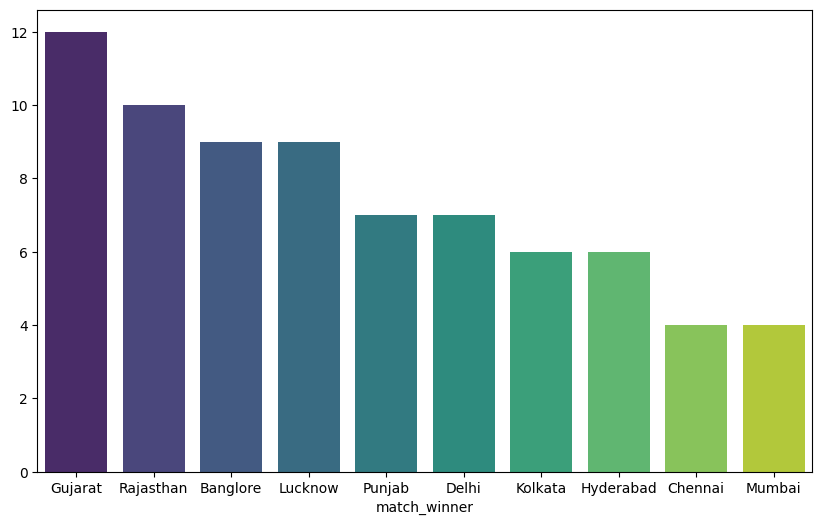

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=match_wins.index, y=match_wins.values,palette='viridis')

2. Toss Decision Trend

<Axes: xlabel='toss_decision', ylabel='count'>

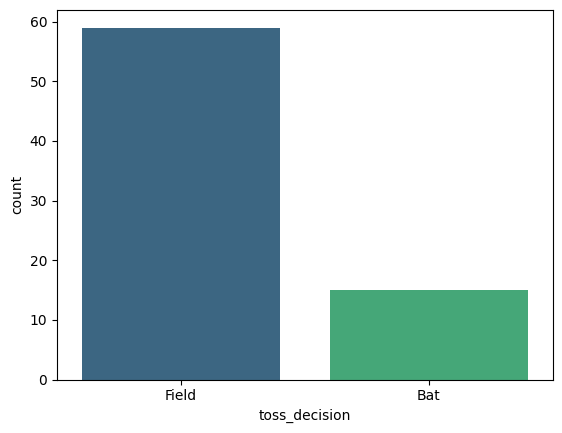

In [30]:
sns.countplot(x=df['toss_decision'],palette='viridis')

3. Toss Winner VS Match Winner

In [38]:
count_tw_mw = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = count_tw_mw * 100 / df.shape[0]
print(f"Winning Chance = {percentage.round(2)}")

Winning Chance = 48.65
